In [10]:
!pip install sqlalchemy

In [11]:
!pip install tomli

In [12]:
!pip install psycopg2-binary

In [13]:
!pip install sentence-transformers umap-learn

In [14]:
import pandas as pd
from src.data.loader import get_db_engine
from src.config import load_config

# Load config
cfg = load_config()
jobs_cfg = cfg['jobs']
table = jobs_cfg['table_name'] #'job_postings"

# Load CSV 
df = pd.read_csv('C:\\Users\\hisuk\\labor-market-nlp-prototype\\data\\raw\\companies_merged.csv')

print("Rows:", df.shape[0])
print(df.columns)

# Save to PostgreSQL
engine = get_db_engine()
df.to_sql(table, engine, if_exists='replace', index=False)

print("DB Load Complete!")


Rows: 24165
Index(['company_id', 'name', 'description', 'company_size', 'state', 'country',
       'city', 'zip_code', 'address', 'url', 'industry', 'speciality',
       'employee_count', 'follower_count', 'time_recorded'],
      dtype='object')
DB Load Complete!


In [15]:
from src.data.loader import load_jobs

jobs = load_jobs(limit=2000)
jobs.head()


,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,employee_count,follower_count,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Cloud,314102,16253625,1712378162
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,Hospitals and Health Care,Healthcare,56873,2185368,1712382540
2,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,IT Services and IT Consulting,None,79528,3586194,1712870106
3,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,IT Services and IT Consulting,enterprise,192099,9465968,1712642952
4,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture,Business Consulting and Services,Management Consulting,574664,11864908,1712641699


Cell 1 – imports & config

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys



# project root = parent of the notebooks folder
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.data.loader import load_jobs


plt.rcParams["figure.figsize"] = (10, 5)
sns.set()


Cell 2 – load a sample of jobs

In [ ]:
from src.data.loader import load_jobs

jobs = load_jobs(limit=2000)
jobs.head()

Cell 3 – basic info

In [17]:
jobs.info()
jobs.describe(include="all").transpose().head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      1999 non-null   int64  
 1   name            1999 non-null   object 
 2   description     1999 non-null   object 
 3   company_size    1977 non-null   float64
 4   state           1999 non-null   object 
 5   country         1999 non-null   object 
 6   city            1999 non-null   object 
 7   zip_code        1998 non-null   object 
 8   address         1999 non-null   object 
 9   url             1999 non-null   object 
 10  industry        1993 non-null   object 
 11  speciality      1692 non-null   object 
 12  employee_count  1999 non-null   int64  
 13  follower_count  1999 non-null   int64  
 14  time_recorded   1999 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 234.4+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_id,1999.0,NaN,NaN,NaN,1544686.843422,9790587.411229,1009.0,3851.0,6915.0,10764.0,103129573.0
name,1999,1999,IBM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,1999,1999,"At IBM, we do more than work. We create. We cr...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,1977.0,NaN,NaN,NaN,5.811836,1.370231,1.0,5.0,6.0,7.0,7.0
state,1999,247,0,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1999,34,US,1637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1999,767,New York,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,1998,1307,0,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,1999,1845,0,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,1999,1999,https://www.linkedin.com/company/ibm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cell 4 – text length distribution

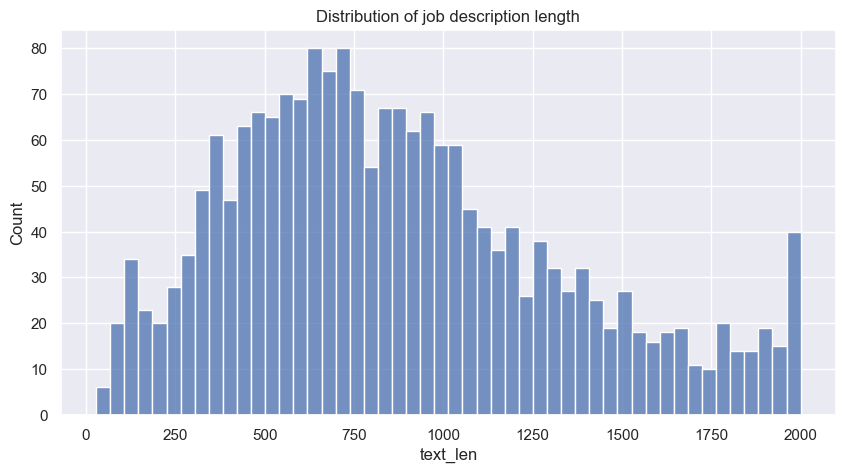

In [18]:
text_col = "description"  # adjust if needed

jobs["text_len"] = jobs[text_col].astype(str).str.len()

jobs["text_len"].describe()
sns.histplot(jobs["text_len"], bins=50)
plt.title("Distribution of job description length")
plt.show()


Cell 5 – top job titles / locations

In [ ]:
if "title" in jobs.columns:
    display(jobs["title"].value_counts().head(20))

if "city" in jobs.columns:
    display(jobs["city"].value_counts().head(20))


city
New York         139
Chicago           56
Atlanta           46
Boston            42
Washington        41
0                 39
London            37
San Francisco     28
Dallas            23
Austin            21
Houston           20
San Jose          19
Los Angeles       19
Philadelphia      17
Denver            17
Minneapolis       17
Columbus          15
San Diego         15
Seattle           15
Paris             13
Name: count, dtype: int64

Cell 6 – quick embedding + scatter

If you want a very simple demo for the client:

c:\Users\hisuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 63/63 [01:06<00:00,  1.06s/it]
c:\Users\hisuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


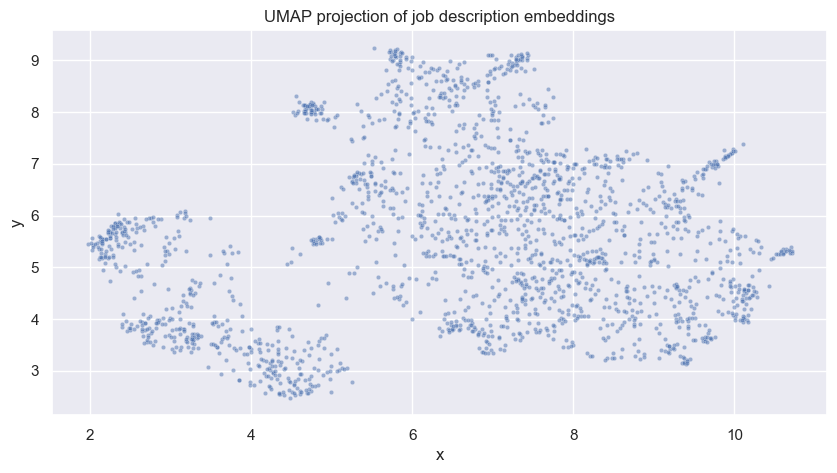

In [20]:
from sentence_transformers import SentenceTransformer
import umap

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# pick a text column name you actually have, e.g. "description"
text_col = "description"  

n = min(len(jobs), 2000)
sample = jobs.sample(n, random_state=42)

emb = model.encode(sample[text_col].tolist(), show_progress_bar=True)

reducer = umap.UMAP(random_state=42)
emb_2d = reducer.fit_transform(emb)

sample["x"] = emb_2d[:, 0]
sample["y"] = emb_2d[:, 1]

sns.scatterplot(
    data=sample,
    x="x",
    y="y",
    alpha=0.5,
    s=10,
)
plt.title("UMAP projection of job description embeddings")
plt.show()

